### Student Information
Name: Gerraldo SC 鄭嘉成

Student ID: 108006218

GitHub ID: Lewisu

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [93]:
### Begin Assignment Here
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
%matplotlib inline

# prepare dataset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [2]:
import data_mining_helpers as dmh
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [3]:
X['category_name'].loc[lambda c: c == "comp.graphics"]

0       comp.graphics
1       comp.graphics
11      comp.graphics
14      comp.graphics
15      comp.graphics
            ...      
2232    comp.graphics
2236    comp.graphics
2241    comp.graphics
2242    comp.graphics
2248    comp.graphics
Name: category_name, Length: 584, dtype: object

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [4]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [5]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

Because isnull() is used to check whether the type value of the data is null or not, and since there's no missing data (or we can say they are not of the type null) it will return false

In [6]:
X_sample = X.sample(n=1000)

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

X_sample only have 1000 samples and it is randomized based on the X dataframe

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

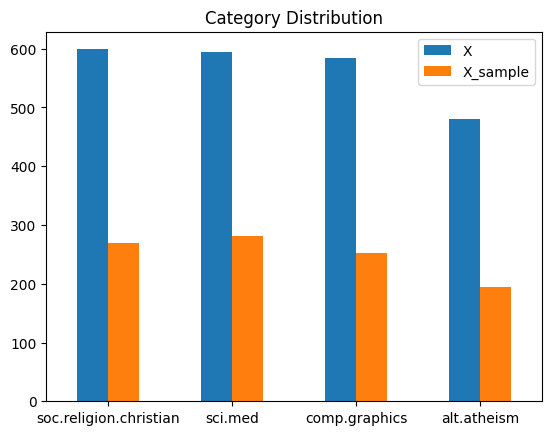

In [7]:
df = pd.DataFrame({'X': X.category_name.value_counts(),
                   'X_sample': X_sample.category_name.value_counts().reindex_like(X.category_name.value_counts())}, 
                  index=X.category_name.value_counts().index.tolist())
ax = df.plot(kind = "bar",
            title = "Category Distribution",
            ylim = [0,max(X.category_name.value_counts()) + 30],
            rot = 0)

In [8]:
X.category_name

0                comp.graphics
1                comp.graphics
2       soc.religion.christian
3       soc.religion.christian
4       soc.religion.christian
                 ...          
2252                   sci.med
2253                   sci.med
2254                   sci.med
2255                   sci.med
2256                   sci.med
Name: category_name, Length: 2257, dtype: object

In [9]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [10]:
count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
X_counts = count_vect.fit_transform(X.text)

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [11]:
idx = np.where(X_counts[4, 0:100].toarray() == 1)[1][1]
idx

37

In [12]:
count_vect.get_feature_names_out()[idx:idx+1]

array(['01'], dtype=object)

In [13]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [14]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [15]:
plot_z = X_counts[0:20, 0:20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

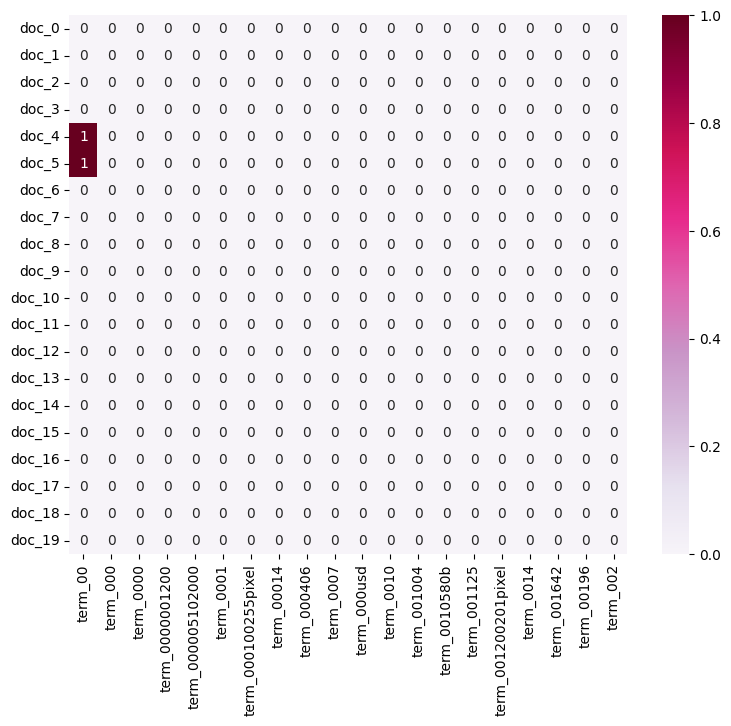

In [16]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [17]:
count_vects = CountVectorizer(max_df = 4, min_df = 2, stop_words = 'english')
analyze = count_vects.build_analyzer()
sample = X.text.sample(n = 50)
X_counts_sample = count_vects.fit_transform(sample)

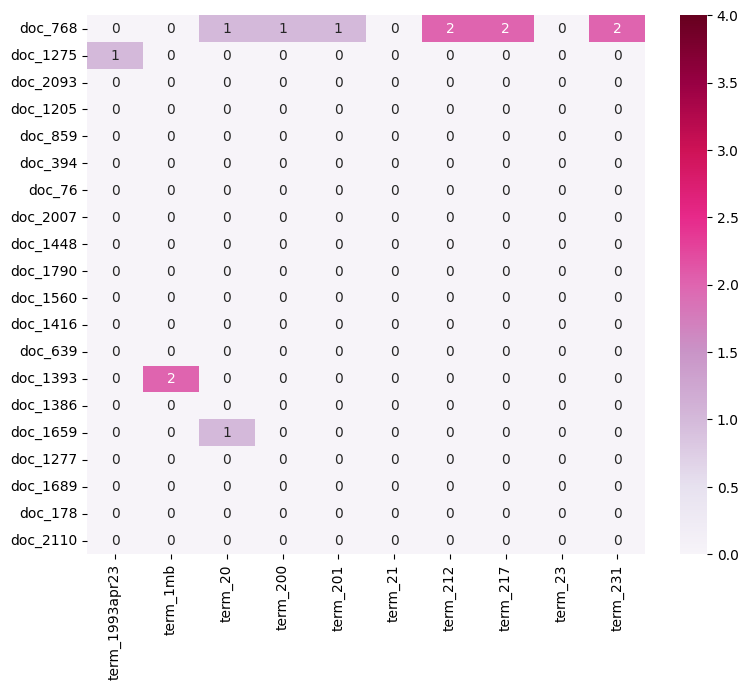

In [18]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vects.get_feature_names_out()[30:40]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(sample.index)[0:20]]
plot_z = X_counts_sample[0:20, 30:40].toarray()


df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
#print(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=4, annot=True)

In [19]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
X_reduced

array([[-17.01172954,   0.45016639],
       [ -6.80574586,  -1.15880601],
       [ 15.79461065,   3.62233104],
       ...,
       [ 19.97508176,  -2.85495802],
       [163.88523745,  29.52467609],
       [-16.58569528,   0.61748549]])

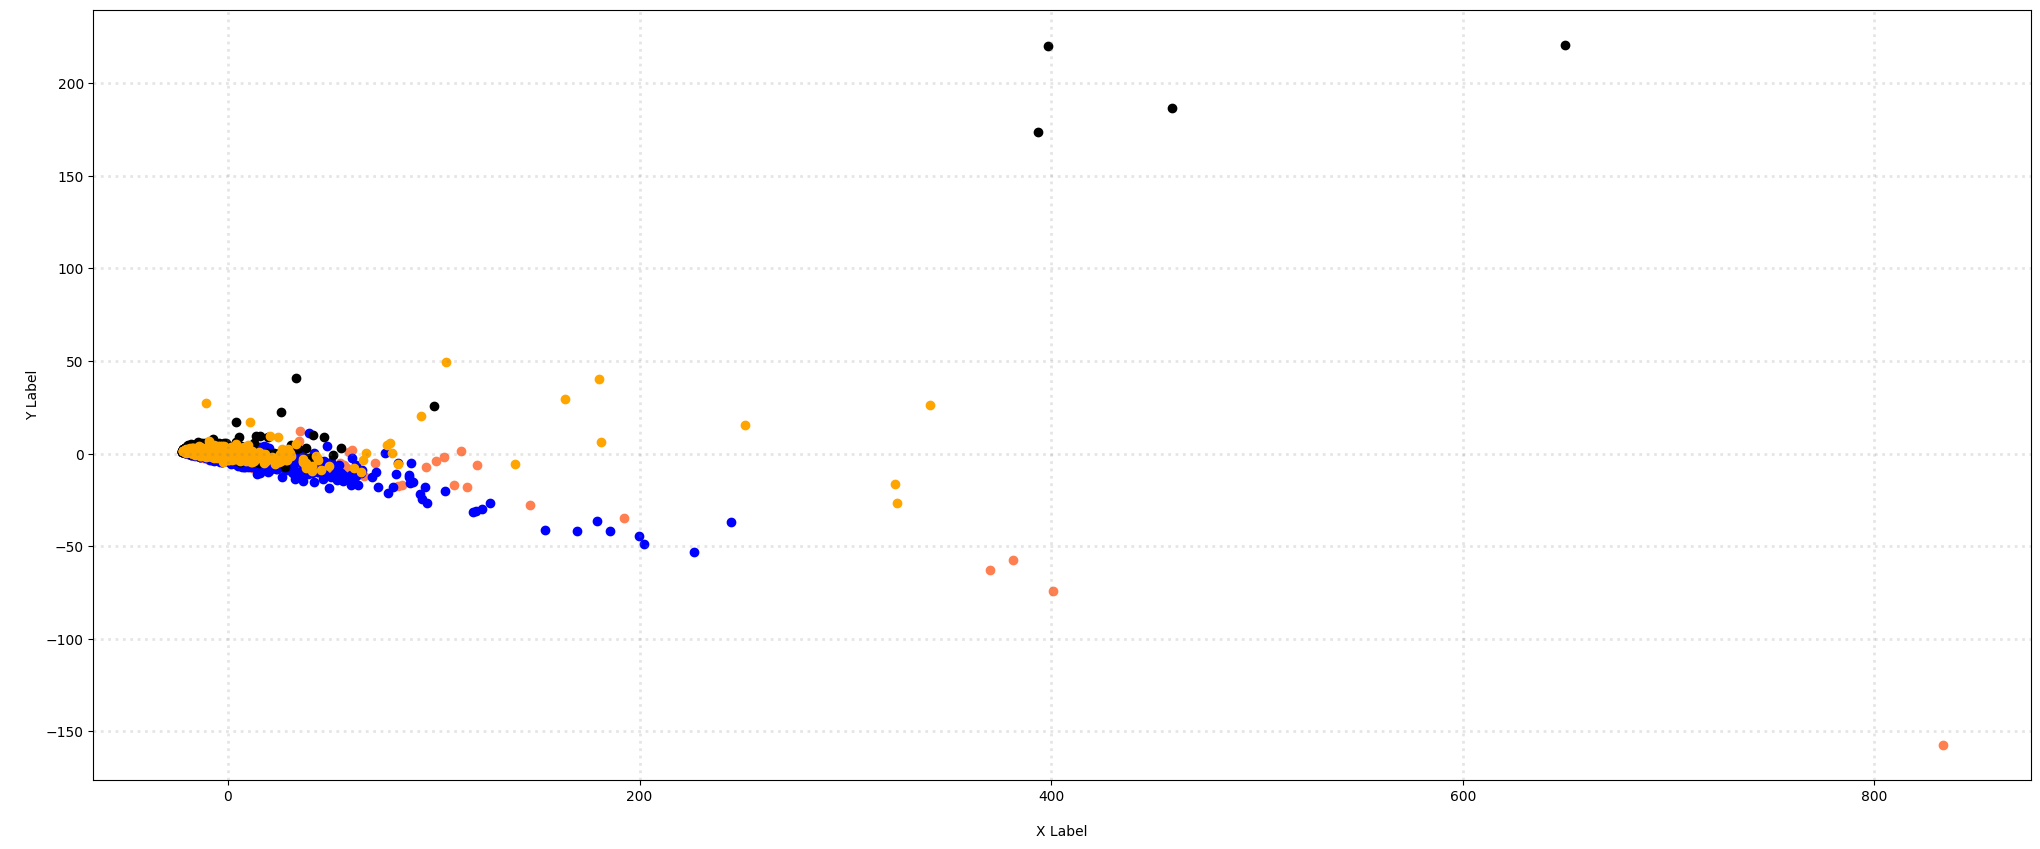

In [20]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]

    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [21]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced

array([[-17.01172954,   0.45016639,  -1.3122607 ],
       [ -6.80574586,  -1.158806  ,  -0.40488274],
       [ 15.79461065,   3.62233099,  12.70799064],
       ...,
       [ 19.97508176,  -2.85495805,   1.04076603],
       [163.88523745,  29.52467725,  -8.70178678],
       [-16.58569528,   0.61748552,  -1.88007227]])

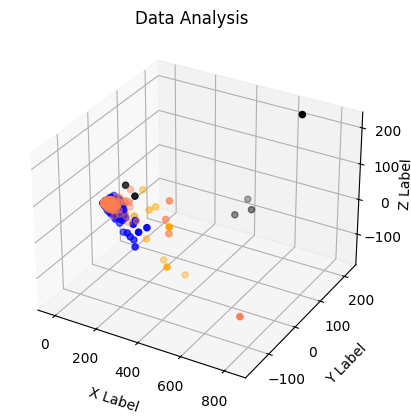

In [22]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_title("Data Analysis ")
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('Z Label')
ax.zaxis.labelpad = 0

plt.show()

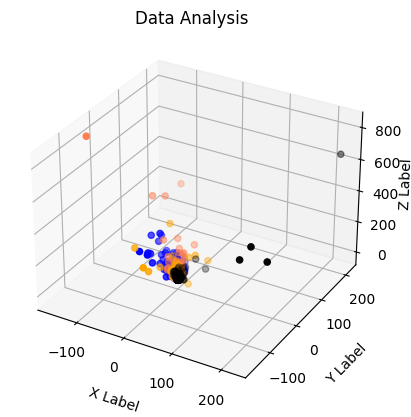

In [23]:
# plot
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

for c, category in zip(col, categories):
    zs = X_reduced[X['category_name'] == category].T[0]
    xs = X_reduced[X['category_name'] == category].T[1]
    ys = X_reduced[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_title("Data Analysis ")
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('Z Label')
ax.zaxis.labelpad = 0

plt.show()

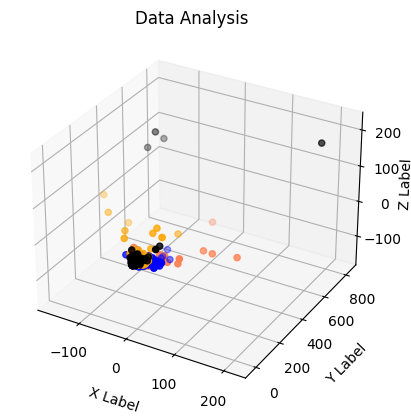

In [24]:
# plot
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

for c, category in zip(col, categories):
    ys = X_reduced[X['category_name'] == category].T[0]
    zs = X_reduced[X['category_name'] == category].T[1]
    xs = X_reduced[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_title("Data Analysis ")
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('Z Label')
ax.zaxis.labelpad = 0

plt.show()

It is still very hard to see the placement of the data as a lot of them are in a very similar spot and the position is very close because some of the data has a very high value difference from most of the data

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [25]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts_sample.shape[1]):
    term_frequencies.append(sum(X_counts_sample[:,j].toarray()))
    
term_frequencies = np.asarray(X_counts_sample.sum(axis=0))[0]

In [26]:
term_frequencies[0] #sum of first term

6

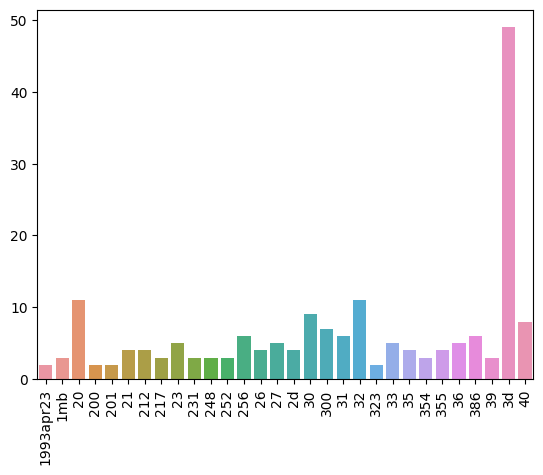

In [27]:
plt.subplots()
g = sns.barplot(x=count_vects.get_feature_names_out()[30:60], 
            y=term_frequencies[30:60])
g.set_xticklabels(count_vects.get_feature_names_out()[30:60], rotation = 90);

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [28]:
sorted_freq = sorted(term_frequencies)[::-1]

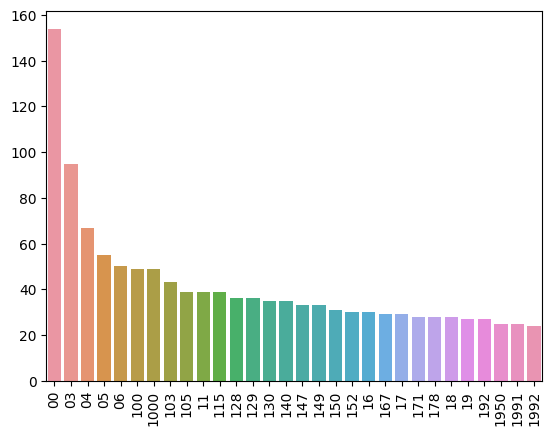

In [29]:
plt.subplots()
g = sns.barplot(x=count_vects.get_feature_names_out()[:30], 
            y=sorted_freq[:30])
g.set_xticklabels(count_vects.get_feature_names_out()[:30], rotation = 90);


### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [30]:
# Binarizer
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()

In [31]:
X[0:9]

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


In [32]:
# Read data from txt files
data1 = pd.read_table(filepath_or_buffer = "imdb_labelled.txt", names = ["sentence", "score"])
data2 = pd.read_table(filepath_or_buffer = "amazon_cells_labelled.txt", names = ["sentence", "score"])
data3 = pd.read_table(filepath_or_buffer = "yelp_labelled.txt", names = ["sentence", "score"])

# Add source column labels
data1["source"] = "imdb"
data2["source"] = "amazon"
data3["source"] = "yelp"

In [33]:
data1

,sentence,score,source
0,"A very, very, very slow-moving, aimless movie ...",0,imdb
1,Not sure who was more lost - the flat characte...,0,imdb
2,Attempting artiness with black & white and cle...,0,imdb
3,Very little music or anything to speak of.,0,imdb
4,The best scene in the movie was when Gerardo i...,1,imdb
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,imdb
744,"Unfortunately, any virtue in this film's produ...",0,imdb
745,"In a word, it is embarrassing.",0,imdb
746,Exceptionally bad!,0,imdb


In [34]:
data2

,sentence,score,source
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
995,The screen does get smudged easily because it ...,0,amazon
996,What a piece of junk.. I lose more calls on th...,0,amazon
997,Item Does Not Match Picture.,0,amazon
998,The only thing that disappoint me is the infra...,0,amazon


In [35]:
data3

,sentence,score,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp
...,...,...,...
995,I think food should have flavor and texture an...,0,yelp
996,Appetite instantly gone.,0,yelp
997,Overall I was not impressed and would not go b...,0,yelp
998,"The whole experience was underwhelming, and I ...",0,yelp


In [36]:
# Combine all 3 dataset into 1
alldata = pd.concat([data1, data2, data3], ignore_index = True)
alldata = alldata.sample(frac=1).reset_index(drop=True)
alldata

,sentence,score,source
0,Her role was played well.,1,imdb
1,No one at the table thought the food was above...,0,yelp
2,Go rent it.,1,imdb
3,"Otherwise, easy to install and use, clear sound.",1,amazon
4,Tried to go here for lunch and it was a madhouse.,0,yelp
...,...,...,...
2743,The picture resolution is far below what other...,0,amazon
2744,It kept getting worse and worse so now I'm off...,0,yelp
2745,Very good quality though,1,amazon
2746,"Very convenient, since we were staying at the ...",1,yelp


In [37]:
len(alldata)

2748

In [38]:
alldata[0:2]

,sentence,score,source
0,Her role was played well.,1,imdb
1,No one at the table thought the food was above...,0,yelp


In [39]:
alldata[0:10][['sentence', 'source']]

,sentence,source
0,Her role was played well.,imdb
1,No one at the table thought the food was above...,yelp
2,Go rent it.,imdb
3,"Otherwise, easy to install and use, clear sound.",amazon
4,Tried to go here for lunch and it was a madhouse.,yelp
5,We won't be going back anytime soon!,yelp
6,"It didn't make me scared, horrified, or make m...",imdb
7,I ordered the Voodoo pasta and it was the firs...,yelp
8,This is essentially a communications tool that...,amazon
9,"Simple, lightweight and great fit.",amazon


In [40]:
alldata[-10:]

,sentence,score,source
2738,Think it over when you plan to own this one!Th...,0,amazon
2739,"We got sitting fairly fast, but, ended up wait...",0,yelp
2740,"When I'm on this side of town, this will defin...",1,yelp
2741,A world better than 95% of the garbage in the ...,1,imdb
2742,"With great sound effects, and impressive spec...",1,imdb
2743,The picture resolution is far below what other...,0,amazon
2744,It kept getting worse and worse so now I'm off...,0,yelp
2745,Very good quality though,1,amazon
2746,"Very convenient, since we were staying at the ...",1,yelp
2747,Ambience is perfect.,1,yelp


In [41]:
alldata.loc[:10, 'sentence']

0                           Her role was played well.  
1     No one at the table thought the food was above...
2                                         Go rent it.  
3      Otherwise, easy to install and use, clear sound.
4     Tried to go here for lunch and it was a madhouse.
5                  We won't be going back anytime soon!
6     It didn't make me scared, horrified, or make m...
7     I ordered the Voodoo pasta and it was the firs...
8     This is essentially a communications tool that...
9                    Simple, lightweight and great fit.
10    I didn't know pulled pork could be soooo delic...
Name: sentence, dtype: object

In [42]:
alldata.iloc[:10, 0]

0                          Her role was played well.  
1    No one at the table thought the food was above...
2                                        Go rent it.  
3     Otherwise, easy to install and use, clear sound.
4    Tried to go here for lunch and it was a madhouse.
5                 We won't be going back anytime soon!
6    It didn't make me scared, horrified, or make m...
7    I ordered the Voodoo pasta and it was the firs...
8    This is essentially a communications tool that...
9                   Simple, lightweight and great fit.
Name: sentence, dtype: object

In [43]:
alldata[0:10][['sentence', 'source']]

,sentence,source
0,Her role was played well.,imdb
1,No one at the table thought the food was above...,yelp
2,Go rent it.,imdb
3,"Otherwise, easy to install and use, clear sound.",amazon
4,Tried to go here for lunch and it was a madhouse.,yelp
5,We won't be going back anytime soon!,yelp
6,"It didn't make me scared, horrified, or make m...",imdb
7,I ordered the Voodoo pasta and it was the firs...,yelp
8,This is essentially a communications tool that...,amazon
9,"Simple, lightweight and great fit.",amazon


In [44]:
alldata[alldata['source'] == "imdb"]

,sentence,score,source
0,Her role was played well.,1,imdb
2,Go rent it.,1,imdb
6,"It didn't make me scared, horrified, or make m...",0,imdb
11,"The movie was so boring, that I sometimes foun...",0,imdb
12,I keep watching it over and over.,1,imdb
...,...,...,...
2734,You can find better movies at youtube.,0,imdb
2735,About ten minutes into this film I started hav...,0,imdb
2737,") a happy, wonderful, feel good ending!",1,imdb
2741,A world better than 95% of the garbage in the ...,1,imdb


In [45]:
alldata.isnull()

,sentence,score,source
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2743,False,False,False
2744,False,False,False
2745,False,False,False
2746,False,False,False


In [46]:
alldata.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,source
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [47]:
alldata.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2743    (The amoung of missing records is: , 0)
2744    (The amoung of missing records is: , 0)
2745    (The amoung of missing records is: , 0)
2746    (The amoung of missing records is: , 0)
2747    (The amoung of missing records is: , 0)
Length: 2748, dtype: object

In [48]:
sum(alldata.duplicated())

17

In [49]:
alldata.drop_duplicates(inplace = True)

In [50]:
len(alldata)

2731

In [51]:
alldata_sample = alldata.sample(n = 500)

In [52]:
alldata_sample[0:10]

,sentence,score,source
702,Better Than New.,1,amazon
1488,This is one of the worst Sandra Bullock movie ...,0,imdb
1759,"It was very popular when I was in the cinema, ...",1,imdb
655,"Also, the phone doesn't seem to accept anythin...",0,amazon
770,This case seems well made.,1,amazon
2693,I work in the hospitality industry in Paradise...,0,yelp
61,"Clear Skype Calls, Long Battery Life, Long Range.",1,amazon
707,Better than you'd expect.,1,amazon
54,"I had strawberry tea, which was good.",1,yelp
367,What on earth is Irons doing in this film?,0,imdb


yelp      996
amazon    990
imdb      745
Name: source, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

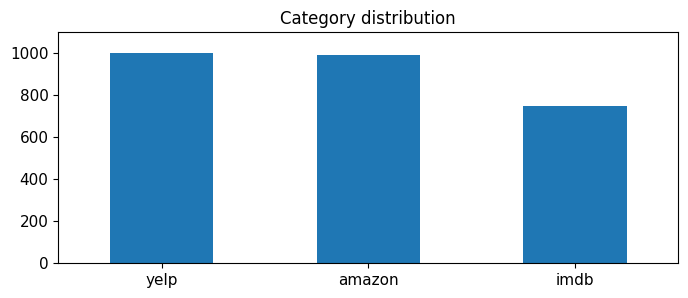

In [53]:
print(alldata.source.value_counts())
alldata.source.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, max(alldata.source.value_counts()) + 100],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

yelp      189
amazon    176
imdb      135
Name: source, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

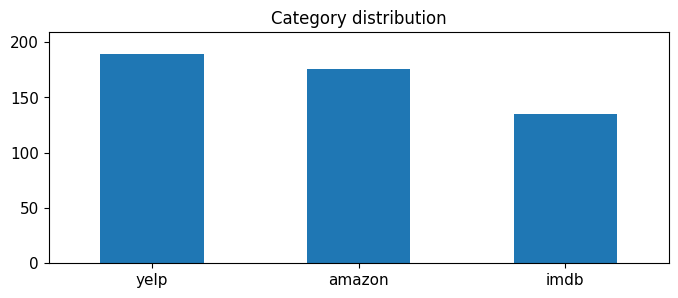

In [54]:
print(alldata_sample.source.value_counts())
alldata_sample.source.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, max(alldata_sample.source.value_counts()) + 20],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

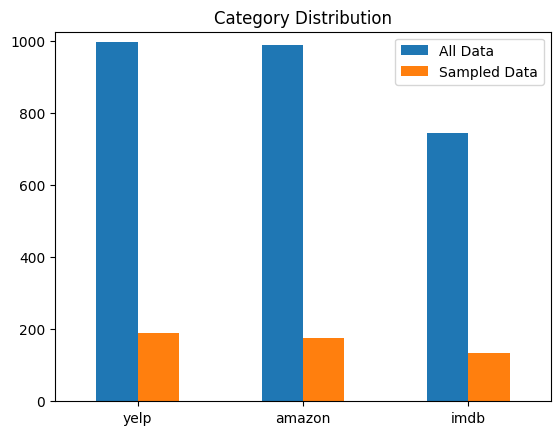

In [55]:
df = pd.DataFrame({'All Data': alldata.source.value_counts(),
                   'Sampled Data': alldata_sample.source.value_counts().reindex_like(alldata.source.value_counts())}, 
                  index = alldata.source.value_counts().index.tolist())
ax = df.plot(kind = "bar",
            title = "Category Distribution",
            ylim = [0,max(alldata.source.value_counts()) + 30],
            rot = 0)

In [56]:
# All data vectorizer
allvect = CountVectorizer(max_features = 200, stop_words = 'english', min_df = 5)
all_counts = allvect.fit_transform(alldata.sentence)
print(all_counts[0])

In [57]:
allanalyze = allvect.build_analyzer()
allanalyze("Great case and price!")

['great', 'case', 'price']

In [58]:
allanalyze(alldata['sentence'][0])

['role', 'played']

In [59]:
all_counts.shape

(2731, 200)

In [60]:
allvect.get_feature_names_out()[-10:]

array(['work', 'worked', 'working', 'works', 'worse', 'worst', 'worth',
       'writing', 'year', 'years'], dtype=object)

In [61]:
all_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [62]:
# first twenty features only
plot_x = ["term_"+str(i) for i in allvect.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(alldata.index)[0:20]]
plot_z = all_counts[0:20, 0:20].toarray()

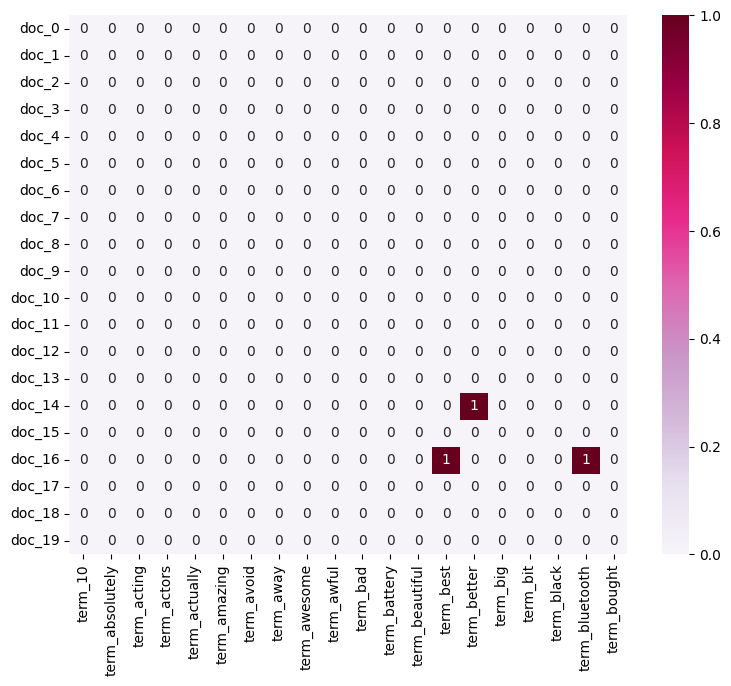

In [63]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [64]:
all_reduced = PCA(n_components = 3).fit_transform(all_counts.toarray())

In [65]:
all_reduced.shape

(2731, 3)

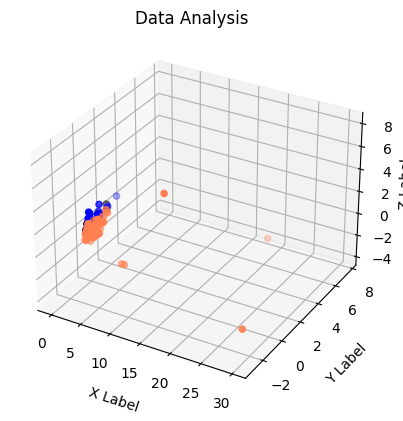

In [66]:
sources = ['imdb', 'yelp', 'amazon'] 
col = ['coral', 'blue', 'black']

# plot
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

for c, src in zip(col, sources):
    xs = all_reduced[alldata['source'] == src].T[0]
    ys = all_reduced[alldata['source'] == src].T[1]
    zs = all_reduced[alldata['source'] == src].T[2]

    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_title("Data Analysis ")
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('Z Label')
ax.zaxis.labelpad = 0

plt.show()

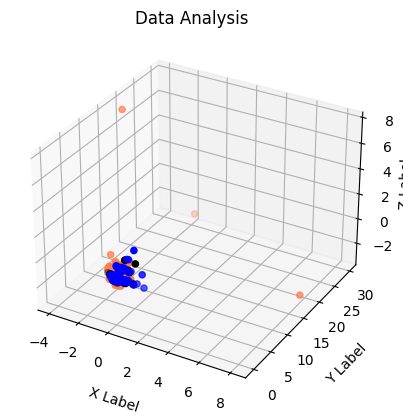

In [67]:
# plot
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

for c, src in zip(col, sources):
    ys = all_reduced[alldata['source'] == src].T[0]
    zs = all_reduced[alldata['source'] == src].T[1]
    xs = all_reduced[alldata['source'] == src].T[2]

    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_title("Data Analysis ")
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('Z Label')
ax.zaxis.labelpad = 0

plt.show()

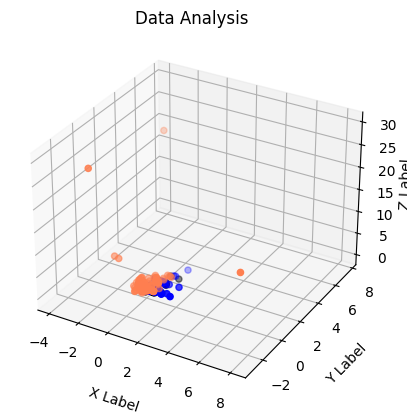

In [68]:
# plot
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

for c, src in zip(col, sources):
    zs = all_reduced[alldata['source'] == src].T[0]
    ys = all_reduced[alldata['source'] == src].T[1]
    xs = all_reduced[alldata['source'] == src].T[2]

    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_title("Data Analysis ")
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('Z Label')
ax.zaxis.labelpad = 0

plt.show()

In [69]:
# First 20 features graph for normal frequency
term_frequencies = []
for j in range(0, all_counts.shape[1]):
    term_frequencies.append(sum(all_counts[:,j].toarray()))
    
term_frequencies = np.asarray(all_counts.sum(axis=0))[0]


In [70]:
term_frequencies[0] #sum of first term

36

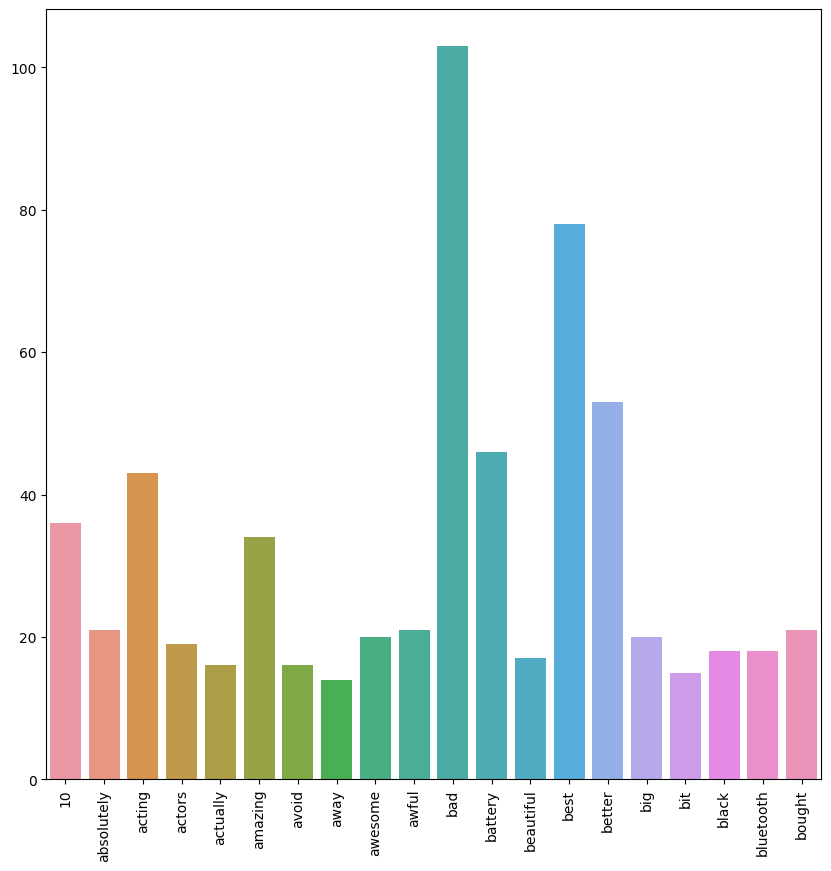

In [71]:
plt.subplots(figsize=(10, 10))
g = sns.barplot(x=allvect.get_feature_names_out()[:20], 
            y=term_frequencies[:20])
g.set_xticklabels(allvect.get_feature_names_out()[:20], rotation = 90);

In [72]:
# Sorted graph for normal frequency
sorted_list = sorted(list(zip(term_frequencies, allvect.get_feature_names_out())), key = lambda x: x[0] , reverse = True)
sorted_freq = []
sorted_name = []
for freq, name in sorted_list:
    sorted_freq.append(freq)
    sorted_name.append(name)

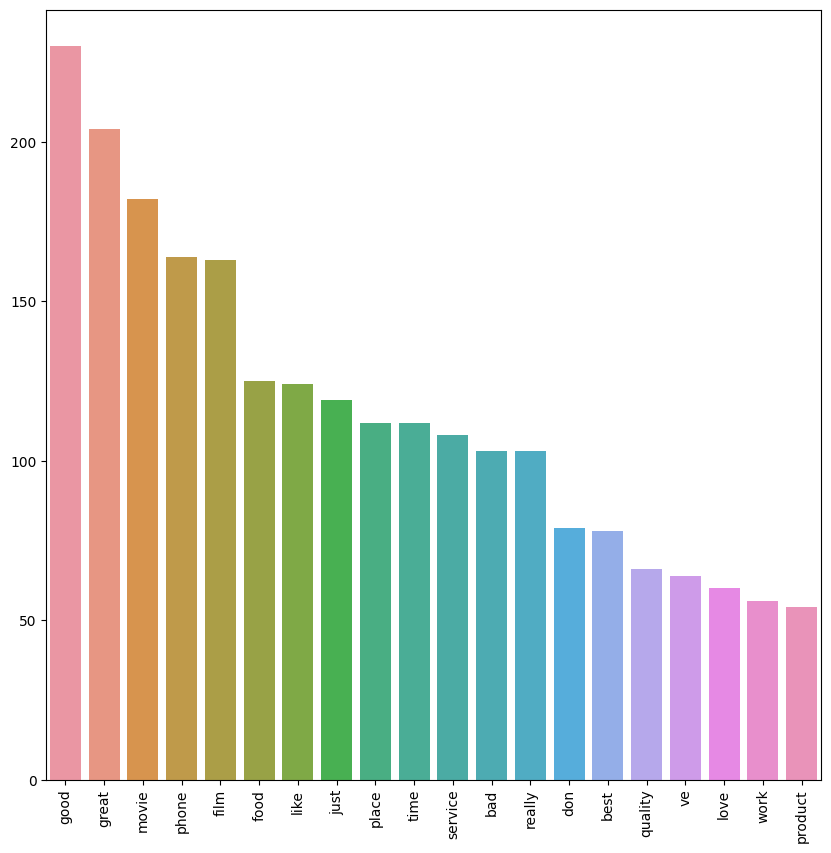

In [73]:
plt.subplots(figsize=(10, 10))
g = sns.barplot(x=sorted_name[:20], 
            y=sorted_freq[:20])
g.set_xticklabels(sorted_name[:20], rotation = 90);

In [74]:
# Binarizer
mlb = preprocessing.LabelBinarizer()
mlb.fit(alldata.source)

LabelBinarizer()

In [75]:
alldata['bin_category'] = mlb.transform(alldata['source']).tolist()

In [76]:
alldata[0:9]

,sentence,score,source,bin_category
0,Her role was played well.,1,imdb,"[0, 1, 0]"
1,No one at the table thought the food was above...,0,yelp,"[0, 0, 1]"
2,Go rent it.,1,imdb,"[0, 1, 0]"
3,"Otherwise, easy to install and use, clear sound.",1,amazon,"[1, 0, 0]"
4,Tried to go here for lunch and it was a madhouse.,0,yelp,"[0, 0, 1]"
5,We won't be going back anytime soon!,0,yelp,"[0, 0, 1]"
6,"It didn't make me scared, horrified, or make m...",0,imdb,"[0, 1, 0]"
7,I ordered the Voodoo pasta and it was the firs...,1,yelp,"[0, 0, 1]"
8,This is essentially a communications tool that...,0,amazon,"[1, 0, 0]"


In [77]:
# Combine all review sentences into 1 list for each website
cosine_list = [[""],[""],[""]]
sam1 = data1["sentence"]
sam2 = data2["sentence"]
sam3 = data3["sentence"]

for d1, d2, d3 in zip(sam1, sam2, sam3):
    cosine_list[0][0] += d1 + " "
    cosine_list[1][0] += d2 + " "
    cosine_list[2][0] += d3 + " "

In [78]:
# Prepare vectorizer for each website
cosvect1 = CountVectorizer(max_features = 10)
cosvect2 = CountVectorizer(max_features = 10)
cosvect3 = CountVectorizer(max_features = 10)

cosvect1.fit_transform(sam1)
cosvect2.fit_transform(sam2)
cosvect3.fit_transform(sam3)

<1000x10 sparse matrix of type '<class 'numpy.int64'>'
	with 2004 stored elements in Compressed Sparse Row format>

In [79]:
# Transform sentence with Vectorizers
document_vector_count_1 = cosvect1.transform(cosine_list[0])
document_vector_count_2 = cosvect2.transform(cosine_list[1])
document_vector_count_3 = cosvect3.transform(cosine_list[2])

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

In [81]:
# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

Cosine Similarity using count bw 1 and 2: 0.787586
Cosine Similarity using count bw 1 and 3: 0.949450
Cosine Similarity using count bw 2 and 3: 0.756780


In [82]:
# tf idf vectorizer
tfidfvect = TfidfVectorizer(max_features = 200, stop_words = 'english')
tfidf_counts = tfidfvect.fit_transform(alldata.sentence)

In [83]:
# first twenty features only
plot_x = ["term_"+str(i) for i in tfidfvect.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(alldata.index)[0:20]]
plot_z = tfidf_counts[0:20, 0:20].toarray()

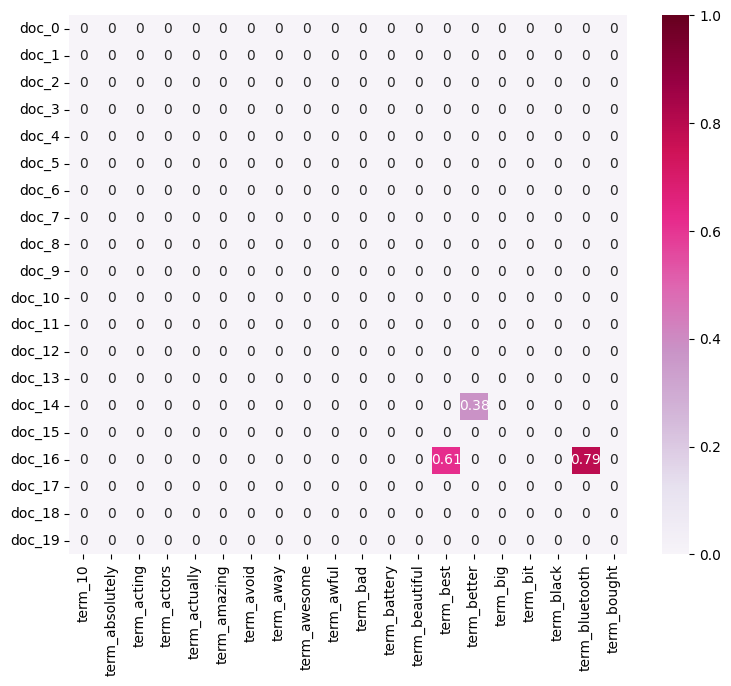

In [84]:
# heatmap for tf idf
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [85]:
# first 20 features graph for tf idf frequencies
tfidf_frequencies = []
for j in range(0, tfidf_counts.shape[1]):
    tfidf_frequencies.append(sum(tfidf_counts[:,j].toarray()))
    
tfidf_frequencies = np.asarray(tfidf_counts.sum(axis=0))[0]

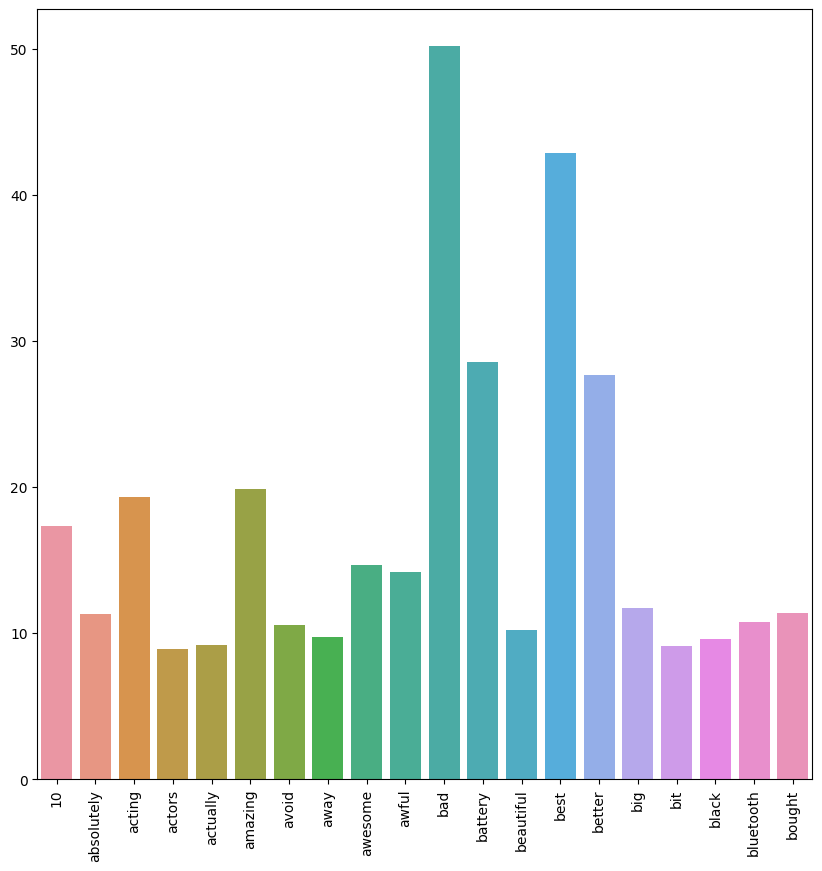

In [86]:
plt.subplots(figsize=(10, 10))
g = sns.barplot(x=tfidfvect.get_feature_names_out()[:20], 
            y=tfidf_frequencies[:20])
g.set_xticklabels(tfidfvect.get_feature_names_out()[:20], rotation = 90);

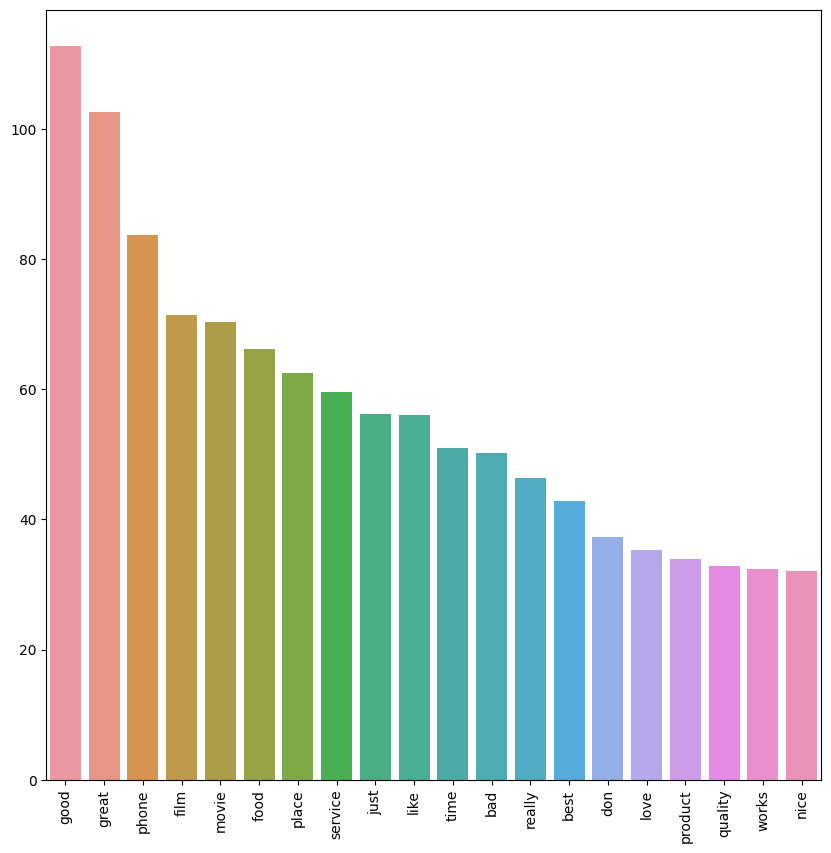

In [87]:
# sorted graph for tf idf frequencies
sorted_list = sorted(list(zip(tfidf_frequencies, tfidfvect.get_feature_names_out())), key = lambda x: x[0] , reverse = True)
sorted_tfidf = []
sorted_name = []
for freq, name in sorted_list:
    sorted_tfidf.append(freq)
    sorted_name.append(name)
plt.subplots(figsize=(10, 10))
g = sns.barplot(x=sorted_name[:20], 
            y=sorted_tfidf[:20])
g.set_xticklabels(sorted_name[:20], rotation = 90);

In [88]:
# Training model for normal frequency classifier
train, test = train_test_split(alldata, test_size = 0.2)
model = make_pipeline(allvect, MultinomialNB(alpha = 1))
model.fit(train.sentence, train.score)
label = model.predict(test.sentence)
model.score(train.sentence, train.score)

0.7554945054945055

<AxesSubplot: >

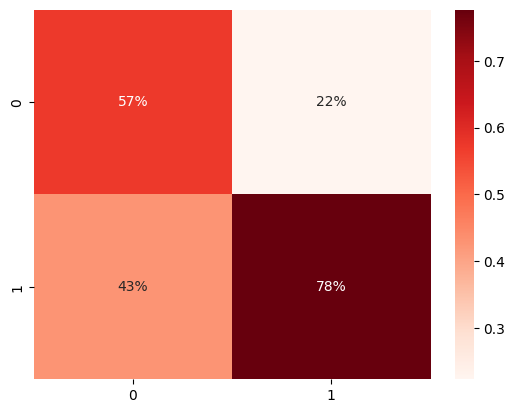

In [89]:
# Confusion matrix for normal frequency classifier
confusion_mat = confusion_matrix(test.score, label, normalize = 'true')
sns.heatmap(confusion_mat.T, annot = True, fmt = ".0%", cmap = "Reds", xticklabels= ["0", "1"], yticklabels = ["0", "1"])

In [91]:
# Training model for tf idf classifier
train, test = train_test_split(alldata, test_size = 0.2)
model = make_pipeline(tfidfvect, MultinomialNB(alpha = 1))
model.fit(train.sentence, train.score)
label = model.predict(test.sentence)
model.score(train.sentence, train.score)

0.7738095238095238

<AxesSubplot: >

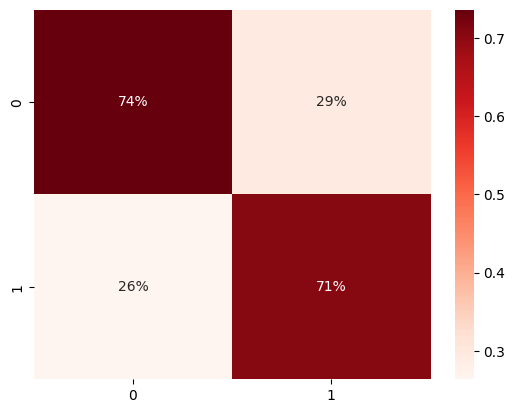

In [92]:
# Confusion matrix for tf idf classifier
confusion_tfidf = confusion_matrix(test.score, label, normalize = 'true')
sns.heatmap(confusion_tfidf.T, annot = True, fmt = ".0%", cmap = "Reds", xticklabels= ["0", "1"], yticklabels = ["0", "1"])